## Contents
- [Dynamic Programming (DP)](#Dynamic-Programming)
    - [Finite-Horizon DP](#Finite-Horizon-DP)
    - [Infinite-Horizon DP](#Infinite-Horizon-DP)
- [Numerical Implementation of DP](#Numerical-Implementation-of-DP)
    - [Neoclassical Growth Model](#Neoclassical-Growth-Model)
    - [Value Function Iteration](#Value-Function-Iteration)
    - [Alternative Solution Methods](#Alternative-Solution-Methods)

# Dynamic Programming (DP)

In this section, we briefly review the basic theory of Dynamic Programming. SLP is always a good place to learn the theory of DP. In this section, we review some of the important theorems in SLP to justify a recursive formulation of a sequential problem. Then we apply Bellman operator to formulate finite-horizon DP and infinite-horizon DP.

In Section 2, we numerically implement DP and solve a standard neoclassical growth model. For the numerical method, we start with a very basic value function iteration algorithm. For the numerical methods, you may refer to LS Ch.4 or some other references in the syllabus.



## Finite-Horizon DP

To illustrate a basic idea of dynamic programming, we follow the notations in LS Ch.3.
First, we start with a finite-horizon problem and will extend this to an infinite-horizon problem.

Consider a discrete-time finite-horizon problem indexed by $t=0,1,...,T<\infty$. Let $\beta\in(0,1)$ be a discount factor and we choose a sequence of $\{u_t\}_{t=0}^T$ that maximizes the present discounted utility:

$$W(x_0) \equiv \max_{\{u_t\}} \sum_{t=0}^T \beta^t r(x_t, u_t)$$

subject to a constraint:

$$x_{t+1} = g(x_t,u_t), \quad t=0,1,2,...,T$$

with $x_0>0$ given.

In this problem, $u_t\in U \subset \mathbb{R}^{m}$ is a control variable, $x_t\in X \subset \mathbb{R}^{n}$ is a state variable, $g:X\times U \rightarrow X$ is a transition function, and $r:X\times U \rightarrow \mathbb{R}$ is a reward function.

We can reformulate this sequential problem into a recursive Bellman equation:

$$V_t(x_t) = \max_{u_t} r(x_t,u_t) + \beta V_{t+1}(g(x_t,u_t)), \quad t=0,1,2,...,T$$

Then the following proposition illustrates the solution of this problem.

**Proposition.** *$W(x_0) = V_0(x_0)$ where the function $V_0(x_0)$ is given by
\begin{align}
V_T(x_T) &= \max_{u_T} r(x_T,u_T)\\
V_{T-1}(x_{T-1}) &= \max_{u_{T-1}} r(x_{T-1},u_{T-1}) + \beta V_{T}(g(x_{T-1},u_{T-1}))\\
V_{T-2}(x_{T-2}) &= \max_{u_{T-2}} r(x_{T-2},u_{T-2}) + \beta V_{T-1}(g(x_{T-2},u_{T-2}))\\
.\\
.\\
.\\
V_{1}(x_{1}) &= \max_{u_{1}} r(x_{1},u_{1}) + \beta V_{2}(g(x_{1},u_{1}))\\
V_{0}(x_{0}) &= \max_{u_{0}} r(x_{0},u_{0}) + \beta V_{1}(g(x_{0},u_{0}))
\end{align}
Furthermore, the sequence $\{u_t\}_{t=0}^T$ that solves each Bellman equation is the solution to the original sequential problem.*

Here we skip a formal proof, but the idea of the proof is a mathematical induction.
This proposition clearly illustrates that a finite-horizon problem can be solved by backward induction.



## Infinite-Horizon DP

Now, let's consider a sequential infinite-horizon problem.

$$W(x_0) \equiv \max_{\{u_t\}} \sum_{t=0}^\infty \beta^t r(x_t, u_t)$$

subject to a constraint:

$$x_{t+1} = g(x_t,u_t), \quad t=0,1,2,...$$

with $x_0>0$ given.

In the infinite horizon problem, the principal complication arises from the fact that there is no end period. This implies that we are not able to use a backward induction to solve the problem. But instead we make use of properties of stationarity. Note that this problem is stationary in the sense that the return function is not time-dependent. In other words, instead of finding an infinite sequence of controls $\{u_t\}_{t=0}^\infty$, DP seeks a time-invariant *policy function* $u_t = h(x_t)$ and the associated *value function* $V(x_t)$. The stationarity implies that if the state for any two different points in time is the same, the policy must be the same. This doesn't mean that the information set is the same at those two different points in time.

The Bellman equation of this sequential problem can be written as follows:

\begin{equation}
V(x_t) = \max_{u_t} r(x_t,u_t) + \beta V(g(x_t,u_t))
\end{equation}
or since the policy function and value function are time-invariant, we often ignore time subscript and put $x_{t+1} = x'$:
\begin{equation}
V(x) = \max_{u} r(x,u) + \beta V(x') \quad \text{s.t.} \quad x' = g(x,u)
\end{equation}


Assume that the value function $V$ is differentiable (note that Benveniste-Scheinkman Theorem shows that under a weak assumption the value function is differentiable). Then the first-order condition becomes

\begin{equation}
\frac{\partial r(x,u)}{\partial u} + \beta \frac{dV(x')}{dx'} \frac{\partial g(x,u)}{\partial u} = 0
\end{equation}

Also by the envelope theorem,
\begin{equation}
\frac{d V}{d x} = \frac{\partial r(x,u)}{\partial x} + \beta \frac{dV}{dx'} \frac{\partial g(x,u)}{\partial x}
\end{equation}
Note that these two conditions formulate an intertemporal optimality condition.

In general, solving for an explicit form of policy and value functions is in most cases impossible (only for some cases are possible) and hence we have to use computational algorithms to numericallly solve this problem.




[Add] Principle of Optimality
Contraction Mapping
Convergence of value function

[Add] Approximation of function

# Numerical Implementation of DP

In this section, we introduce a numerical method to solve a dynamic programming problem. To be explicit about a problem we are solving, let's use a standard neoclassical growth model.

## Neoclassical Growth Model

The sequential formulation of the problem is the following. The representative agent chooses a sequence of consumption to maximize the following present discounted utility:

\begin{equation}
\sum^{\infty}_{t=0} \beta^t u(c_t)
\end{equation}

where $\beta \in (0,1)$, $c_t \in \mathbb{R_+}$ is consumption, $u:\mathbb{R_+}\rightarrow \mathbb{R}$ is an increasing, strictly concave, and differentiable function.

Given the initial stock of capital $k_0> 0$, a resource constraint in this economy is:

\begin{equation}
c_t + x_t \leq f(k_t)
\end{equation}

where $x_t\in \mathbb{R_+}$ is a flow gross investment, $k_t\in \mathbb{R_+}$ is a stock of capital, and $f:\mathbb{R_+} \rightarrow \mathbb{R}$ is an increasing, strictly concave, and differentiable production function. Also, we assume an interior solution.

The law of motion for capital is:

\begin{equation}
k_{t+1} \leq (1-\delta)k_t + x_t
\end{equation}

where $\delta\in[0,1]$ is a depreciation rate of capital.


**Recursive Formulation of the Problem:**

Bellman equation of the problem can be written as

\begin{equation}
V(k) = \max u(f(k)+(1-\delta)k-k') + \beta V(k')
\end{equation}

Then, we need to find a time-invariant value function $V(k)$ and policy function $h(k) = k'$.


## Value Function Iteration

To numerically solve the problem, we use a value function iteration algorithm to solve the problem. The algorithm follows the steps below.

1. Choose any $ v^0 \in \mathbb{R}^n $, and specify $ \varepsilon > 0 $; set $ i = 0 $  
1. Compute $ v^{i+1} = T v^i $  
1. If $ \lVert v^{i+1} - v^i\rVert <  [(1 - \beta) / (2\beta)] \varepsilon $,
  then go to step 4; otherwise, set $ i = i + 1 $ and go to step 2  
1. Compute a associated policy function $ \sigma $, and return $ v^{i+1} $ and $ \sigma $  


Given $ \varepsilon > 0 $, the value fucntion iteration algorithm

- terminates in a finite number of iterations  
- returns an $ \varepsilon/2 $-approximation of the optimal value function and an $ \varepsilon $-optimal policy function (unless `iter_max` is reached)  


(While not explicit, in the actual implementation each algorithm is
terminated if the number of iterations reaches `iter_max`)


**Setup 1. Define NGM class (object oriented programming).**

In [2]:
import numpy as np

class ngm:
    # INITIALIZATION OF NGM CLASS WITH GIVEN PREDETERMINED PARAMETERS VALUES
    def __init__(self,  nk      = 1000,
                        α       = 0.34,
                        β       = 0.95,
                        σ       = 2,
                        δ       = 0.04):

        # GRID FOR k
        self.nk             = nk
        self.kgrid          = np.zeros(nk)

        # MODEL PARAMETERS
        self.α              = α
        self.β              = β
        self.σ              = σ
        self.δ              = δ
        
        # COMPUTE STEADY STATE CAPITAL-LABOR RATIO
        self.k_ss           = ((1/β-1+δ)/α)**(1/(α-1))

        # INITIALIZE VALUE FUNCTION AND POLICY FUNCTION
        self.V              = np.zeros(nk)
        self.kp             = np.zeros(nk)


    def init_kgrid(self):
        '''
        This function constructs and returns grid points for state k.
        The grid points are in equidistance.
        '''
        # THE MIN AND MAX VALUES OF k RANGE
        kmin = 0.5*self.k_ss
        kmax = 1.5*self.k_ss

        # DISCRETIZE THE RANGE WITH NK GRID POINTS BY AN EQUIDISTANCE
        self.kgrid = np.linspace(kmin,kmax,self.nk)
        
        # RETURN THE GRID POINTS
        return self.kgrid


    def util(self,cons):
        '''
        This function returns the value of CRRA utility with σ
        u(c) = c**(1-σ)/(1-σ)
        '''
        if self.σ != 1:
            uu = cons**(1-self.σ)/(1-self.σ)
        else:
            uu = np.log(cons)
        return uu

    def get_V(self):
        '''
        This function returns the value function
        '''
        return self.V

    def set_V(self,VV):
        '''
        This function updates the value function
        '''
        self.V   = VV
        
    def set_kp(self,kp):
        '''
        This function updates the policy function
        '''
        self.kp   = kp        

**Setup 2. Construct Bellman equation**

In [3]:
def bellman(kp,k0,kgrid,VV,α,β,σ,δ):
    '''
    This function computes bellman equation for a given state k0.
    Input:
        kp: an evaluating point of k'
        k0: current state of capital-labor ratio
        kgrid: predetermined discrete state space
        VV: next period's value function at k'
        α,β,σ,δ: model parameters
    Output:
        -vv: value function (negative so that fminbound search for a minimum value)
    ''' 

    # Interpolate next period's value function evaluated at k'
    # using 1-dimensional interpolation function in numpy
    V1         = np.interp(kp,kgrid,VV)
        
    # Interpolated value cannot be NaN or Inf
    if np.isnan(V1) or np.isinf(V1): print("bellman: V1 is NaN.")

    # Compute consumption at a given k0 and k'
    cons = k0**α + (1 - δ)*k0 - kp
    
    # Consumption must be non-negative
    if cons<=0:
        # Assign some large negative values
        vv = cons*1000
    else:
        # Compute value function
        vv  = cons**(1-σ)/(1-σ) + β*V1
    
    return -vv


**Step 1. Set model parameters and instantiate an NGM object**

In [10]:
# Set values on model parameters
α, β, σ, δ, nk = 0.34, 0.95, 2, 0.01, 100

# Instantiate NGM object
hh = ngm(nk, α, β, σ, δ)

**Step 2. Discretize state space**

To numerically solve the problem above, we have to find a time-invariant value function, $V(k)$, and policy function, $h(k)$, both of which are defined over a state space, say, $[k_{min},k_{max}]$. Even though the state space is a convex set $k \in [k_{min},k_{max}]$, we have to first discretize the state space, so that the value function and policy function can be evaluated at each point in the state space. Therefore, we discretize the state space into $N_k$ grid points: $\{k_0,k_1,k_2,...,k_{N_k-1},k_{N_k}\}$. One of the widely used discretization method is by equi-distance.

In [11]:
# Construct discretized state space in NGM object
kgrid = hh.init_kgrid()

There are alternative ways to discretize the state space. For example, if you know that a function has a curvature at lower values of state variable, then you can approximate the function with more grid points in the lower valus of state variable. In that case, you split the space in equi-distance and take exponents

**Step 3. Guess an initial value function**

To start iteration over the value function, we need to guess an initial value function to start with. Since we know that the value function converges to a unique point from the contraction mapping, an initial guess can be anything. Having said, a good guess will help a faster convergence than a bad guess. In this exercise, let's provide a bad guess, $V(k)=0$ for all $k$.

**Step 4. Run value function iteration (VFI)**

Number of Iteration = 1, Difference = 0.548353.
Number of Iteration = 2, Difference = 0.520934.
Number of Iteration = 3, Difference = 0.494887.
Number of Iteration = 4, Difference = 0.470016.
Number of Iteration = 5, Difference = 0.446172.
Number of Iteration = 6, Difference = 0.423476.
Number of Iteration = 7, Difference = 0.401882.
Number of Iteration = 8, Difference = 0.381354.
Number of Iteration = 9, Difference = 0.361844.
Number of Iteration = 10, Difference = 0.343301.
Number of Iteration = 11, Difference = 0.325675.
Number of Iteration = 12, Difference = 0.308924.
Number of Iteration = 13, Difference = 0.293026.
Number of Iteration = 14, Difference = 0.277927.
Number of Iteration = 15, Difference = 0.263593.
Number of Iteration = 16, Difference = 0.249982.
Number of Iteration = 17, Difference = 0.237070.
Number of Iteration = 18, Difference = 0.224818.
Number of Iteration = 19, Difference = 0.213197.
Number of Iteration = 20, Difference = 0.202173.
Number of Iteration = 21, Dif

Number of Iteration = 191, Difference = 0.000029.
Number of Iteration = 192, Difference = 0.000028.
Number of Iteration = 193, Difference = 0.000027.
Number of Iteration = 194, Difference = 0.000025.
Number of Iteration = 195, Difference = 0.000024.
Number of Iteration = 196, Difference = 0.000023.
Number of Iteration = 197, Difference = 0.000022.
Number of Iteration = 198, Difference = 0.000021.
Number of Iteration = 199, Difference = 0.000019.
Number of Iteration = 200, Difference = 0.000019.
Number of Iteration = 201, Difference = 0.000018.
Number of Iteration = 202, Difference = 0.000017.
Number of Iteration = 203, Difference = 0.000016.
Number of Iteration = 204, Difference = 0.000015.
Number of Iteration = 205, Difference = 0.000014.
Number of Iteration = 206, Difference = 0.000014.
Number of Iteration = 207, Difference = 0.000013.
Number of Iteration = 208, Difference = 0.000012.
Number of Iteration = 209, Difference = 0.000012.
Number of Iteration = 210, Difference = 0.000011.


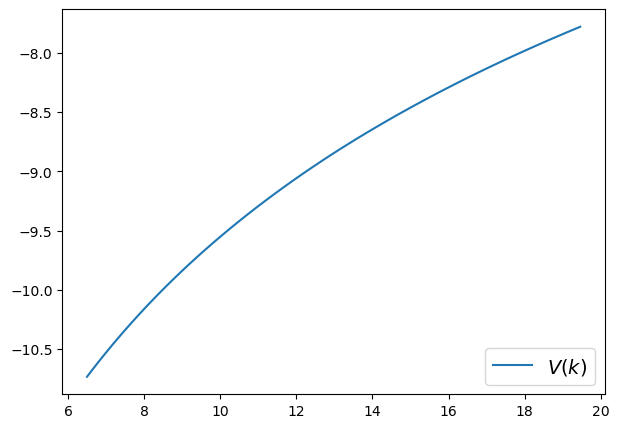

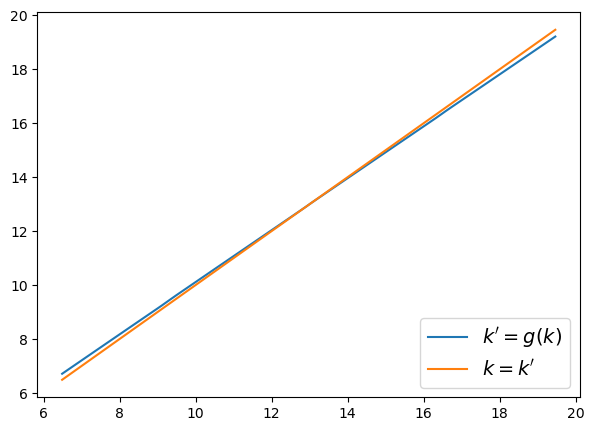

In [12]:
from scipy.optimize import fminbound
import sys
import matplotlib.pyplot as plt
import time


# Set tolerance parameter and an arbitrary initial difference
tol = 1e-5
diff = 1e5
niter  = 0

#Iterate until the difference of old and new value functions are less than the tolerance level
tic = time.perf_counter()
while diff>tol:

    # Start with the current value function
    V_old   = hh.get_V()
    V_new   = np.zeros(nk)
    kp_new  = np.zeros(nk)

    
    # Solve for optimal capital and value function at each point of state k
    for ik in range(nk):
        k0 = kgrid[ik]
        kmin = kgrid[0]
        kmax = kgrid[nk-1]
        kp_new[ik] = fminbound(bellman,kmin,kmax,args=(k0,kgrid,V_old,hh.α,hh.β,hh.σ,hh.δ))
        V_new[ik] = -bellman(kp_new[ik],k0,kgrid,V_old,hh.α,hh.β,hh.σ,hh.δ)
    
    # Update the policy and value functions
    hh.set_V(V_new)
    hh.set_kp(kp_new)
    
    # Compute the difference between new and old value functions by sup norm
    diff = np.max(abs(V_new-V_old))
    niter += 1
    if niter%1==0:
        sys.stdout.write('Number of Iteration = %d, Difference = %f.\n' % (niter,diff))

toc = time.perf_counter()
sys.stdout.write('Value function converged. The elapsed time = %f seconds.\n' % (toc-tic))

# Plot Value Function
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(hh.kgrid, hh.V,label="$V(k)$")
plt.legend(loc='lower right', fontsize = 14)
plt.show()

# Plot Policy Function
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(hh.kgrid, hh.kp,label="$k'=g(k)$")
plt.plot(hh.kgrid, hh.kgrid,label="$k=k'$")
plt.legend(loc='lower right', fontsize = 14)
plt.show()

## Policy Function Iteration

An alternative way of solving the problem is a *policy function iteration* or *Howard's improvement algorithm*. As its name indicates, this algorithm starts with a guess on the policy function and keeps updating the policy function instead of value function. Sometimes, this algorithm solves the problem a little faster than the VFI. Here is a brief sketch of the algorithm.

In the neoclassical growth model setting, let $h()$ be the policy function, $k' = h(k)$.

1. Choose any $ h^0 \in \mathbb{R}^n $, and specify $ \varepsilon > 0 $; set $ i = 0 $  
1. From the initial guess of the policy function, for each $k$ we have $\tilde{k}' = h^0(k)$.
1. Given $(\tilde{k}',k)$, we can compute $u(c) = u(f(k)+(1-\delta) - \tilde{k}')$.
1. If our policy function $h^i$ for any iteration $i=0,1,2,...$ was the optimal specification $h^*$, then the max operator in the bellman equation should be eliminated:
\begin{equation}
v^* = u(f(k)+(1-\delta)k-h^*) + \beta v^*
\end{equation}
1. Then, from this specification, we can solve for v^*: 
\begin{equation}
v^* = \frac{1}{1-\beta}u(f(k)+(1-\delta)k-h^*)
\end{equation}
1. If $h^i$ is not optimal, then the equation above serves as an updating equation. Therefore, by the $i$-th iteration, the updating equation becomes
\begin{equation}
v^{i+1} = \frac{1}{1-\beta}u(f(k)+(1-\delta)k-h^{i})
\end{equation}
1. If $ \lVert v^{i+1} - v^i\rVert <  [(1 - \beta) / (2\beta)] \varepsilon $,
  then go to step 4; otherwise, set $ i = i + 1 $ and go to step 2  
1. An updating equation for a new policy function becomes
\begin{equation}
h^{i+1} = \underset{k'}{\operatorname{argmax}} u(f(k)+(1-\delta)k-k') + \beta v^{i+1}
\end{equation}

## Alternative Solution Methods



| Low dimension problem    | High dimension problem |
|--|--|
|Policy function iteration | Smolyak sparse grid methods (Krueger & Kubler 2004, etc)|
|Projection method (Judd 1992, etc) |Adaptive grid method (Brumm & Scheidegger 2017)  |
|Endogenous grid method (Carroll 2005, etc)| Stochastic simulation algorithm (Den Haan & Marcet 1990, etc) |
|Envelope condition method (Maliar & Maliar 2013)  | $\varepsilon$-distinguishable set method (Judd, Maliar & Maliar 2015)|
|Precomputation method (Judd, Maliar, Maliar, & Tsener 2017)  |Cluster grid method (Judd, Maliar & Maliar 2015) |
| &nbsp; | Perturbation Method (Judd & Guu 1993, etc)
